In [1]:
import numpy as np # linear algebra, arrays
import pandas as pd # data structures
import matplotlib.pyplot as plt # plotting
import xgboost as xgb # extreme gradient boosting
import seaborn as sns # statistical data visualization

In [2]:
df = pd.read_csv('auto-mpg.csv')

In [3]:
df.shape

(398, 9)

In [4]:
df.head(5)

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino


In [5]:
df.sort_values('mpg',ascending=True).head(5)

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
28,9.0,8,304.0,193,4732,18.5,70,1,hi 1200d
25,10.0,8,360.0,215,4615,14.0,70,1,ford f250
26,10.0,8,307.0,200,4376,15.0,70,1,chevy c20
103,11.0,8,400.0,150,4997,14.0,73,1,chevrolet impala
124,11.0,8,350.0,180,3664,11.0,73,1,oldsmobile omega


In [6]:
df.sort_values('mpg',ascending=False).head(10)

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
322,46.6,4,86.0,65,2110,17.9,80,3,mazda glc
329,44.6,4,91.0,67,1850,13.8,80,3,honda civic 1500 gl
325,44.3,4,90.0,48,2085,21.7,80,2,vw rabbit c (diesel)
394,44.0,4,97.0,52,2130,24.6,82,2,vw pickup
326,43.4,4,90.0,48,2335,23.7,80,2,vw dasher (diesel)
244,43.1,4,90.0,48,1985,21.5,78,2,volkswagen rabbit custom diesel
309,41.5,4,98.0,76,2144,14.7,80,2,vw rabbit
330,40.9,4,85.0,?,1835,17.3,80,2,renault lecar deluxe
324,40.8,4,85.0,65,2110,19.2,80,3,datsun 210
247,39.4,4,85.0,70,2070,18.6,78,3,datsun b210 gx


In [7]:
df['horsepower'].unique()

array(['130', '165', '150', '140', '198', '220', '215', '225', '190',
       '170', '160', '95', '97', '85', '88', '46', '87', '90', '113',
       '200', '210', '193', '?', '100', '105', '175', '153', '180', '110',
       '72', '86', '70', '76', '65', '69', '60', '80', '54', '208', '155',
       '112', '92', '145', '137', '158', '167', '94', '107', '230', '49',
       '75', '91', '122', '67', '83', '78', '52', '61', '93', '148',
       '129', '96', '71', '98', '115', '53', '81', '79', '120', '152',
       '102', '108', '68', '58', '149', '89', '63', '48', '66', '139',
       '103', '125', '133', '138', '135', '142', '77', '62', '132', '84',
       '64', '74', '116', '82'], dtype=object)

In [8]:
df = df[df['horsepower'] != '?']

In [9]:
df['horsepower'] = df['horsepower'].astype('float')
df.dtypes

mpg             float64
cylinders         int64
displacement    float64
horsepower      float64
weight            int64
acceleration    float64
model year        int64
origin            int64
car name         object
dtype: object

In [10]:
df['diesel'] = (df['car name'].str.contains('diesel')).astype(int)

In [11]:
df.loc[df['diesel']==1]

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name,diesel
244,43.1,4,90.0,48.0,1985,21.5,78,2,volkswagen rabbit custom diesel,1
325,44.3,4,90.0,48.0,2085,21.7,80,2,vw rabbit c (diesel),1
326,43.4,4,90.0,48.0,2335,23.7,80,2,vw dasher (diesel),1
327,36.4,5,121.0,67.0,2950,19.9,80,2,audi 5000s (diesel),1
359,28.1,4,141.0,80.0,3230,20.4,81,2,peugeot 505s turbo diesel,1
360,30.7,6,145.0,76.0,3160,19.6,81,2,volvo diesel,1
387,38.0,6,262.0,85.0,3015,17.0,82,1,oldsmobile cutlass ciera (diesel),1


In [12]:
df.shape

(392, 10)

In [13]:
df.describe()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,diesel
count,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000
mean,23.445918,5.471939,194.411990,104.469388,2977.584184,15.541327,75.979592,1.576531,0.017857
std,7.805007,1.705783,104.644004,38.491160,849.402560,2.758864,3.683737,0.805518,0.132601
min,9.000000,3.000000,68.000000,46.000000,1613.000000,8.000000,70.000000,1.000000,0.000000
25%,17.000000,4.000000,105.000000,75.000000,2225.250000,13.775000,73.000000,1.000000,0.000000
50%,22.750000,4.000000,151.000000,93.500000,2803.500000,15.500000,76.000000,1.000000,0.000000
75%,29.000000,8.000000,275.750000,126.000000,3614.750000,17.025000,79.000000,2.000000,0.000000
max,46.600000,8.000000,455.000000,230.000000,5140.000000,24.800000,82.000000,3.000000,1.000000


In [14]:
labels = np.array(df['mpg'])
features = df.drop('mpg', axis=1)

In [15]:
from sklearn.model_selection import train_test_split

(train_features_f,test_features_f,train_labels,test_labels) = train_test_split(features, 
                                                                               labels, 
                                                                               test_size=0.25, 
                                                                               random_state=4)

In [16]:
train_features_cont = train_features_f.drop(['car name','diesel'], axis=1)
test_features_cont = test_features_f.drop(['car name','diesel'], axis=1)

In [17]:
from sklearn import preprocessing

scaler = preprocessing.StandardScaler().fit(train_features_cont)

train_features = np.append(scaler.transform(train_features_cont), 
                           train_features_f['diesel'][:,None], 
                           axis=1)
test_features = np.append(scaler.transform(test_features_cont), 
                          test_features_f['diesel'][:,None], 
                          axis=1)

C:\Users\Shubham\AppData\Local\Temp\ipykernel_12164\2386948049.py:6: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  train_features_f['diesel'][:,None],
C:\Users\Shubham\AppData\Local\Temp\ipykernel_12164\2386948049.py:9: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  test_features_f['diesel'][:,None],


In [18]:
print('Shapes')
print('Train features: {0} \nTrain labels: {1}'.format(train_features.shape,
                                                       train_labels.shape))
print('Test features: {0} \nTest labels: {1}'.format(test_features.shape,
                                                     test_labels.shape))

Shapes
Train features: (294, 8) 
Train labels: (294,)
Test features: (98, 8) 
Test labels: (98,)


In [19]:
from sklearn.model_selection import KFold
K = 4 # num splits
kf = KFold(n_splits=K)

C:\Users\Shubham\anaconda3\lib\site-packages\xgboost\core.py:525: FutureWarning: Pass `evals` as keyword args.  Passing these as positional arguments will be considered as error in future releases.
  warnings.warn(


[12:19:49] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/objective/regression_obj.cu:203: reg:linear is now deprecated in favor of reg:squarederror.
[12:19:49] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "silent" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


Fold 1 rmse: 3.4084489209967064
[12:19:49] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/objective/regression_obj.cu:203: reg:linear is now deprecated in favor of reg:squarederror.
[12:19:49] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "silent" } might not be used.

  This could be a false alarm, with some parameters 

C:\Users\Shubham\anaconda3\lib\site-packages\xgboost\core.py:525: FutureWarning: Pass `evals` as keyword args.  Passing these as positional arguments will be considered as error in future releases.
  warnings.warn(


Fold 2 rmse: 3.2442926082148733
[12:19:49] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/objective/regression_obj.cu:203: reg:linear is now deprecated in favor of reg:squarederror.
[12:19:49] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "silent" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


Fold 3 rmse: 3.0054891586885044


C:\Users\Shubham\anaconda3\lib\site-packages\xgboost\core.py:525: FutureWarning: Pass `evals` as keyword args.  Passing these as positional arguments will be considered as error in future releases.
  warnings.warn(
C:\Users\Shubham\anaconda3\lib\site-packages\xgboost\core.py:525: FutureWarning: Pass `evals` as keyword args.  Passing these as positional arguments will be considered as error in future releases.
  warnings.warn(


[12:19:49] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/objective/regression_obj.cu:203: reg:linear is now deprecated in favor of reg:squarederror.
[12:19:49] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "silent" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


Fold 4 rmse: 3.2529683069578788


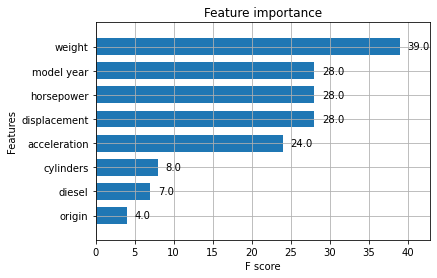

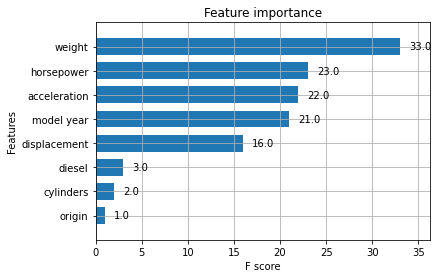

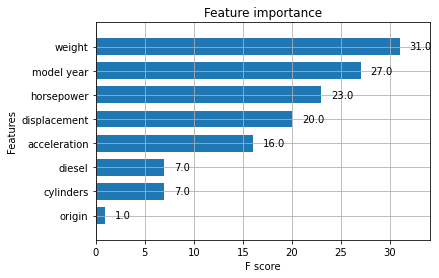

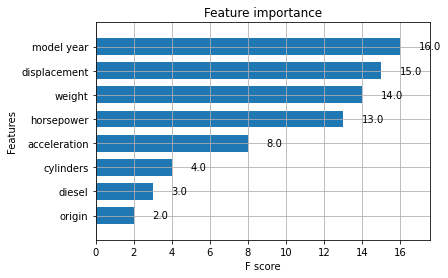

In [20]:
from sklearn import metrics

xgb_predictions = []

for j, (train_index, val_index) in enumerate(kf.split(train_features)):
    partial_train_data,val_data = train_features[train_index],train_features[val_index]
    partial_train_targets,val_targets = train_labels[train_index],train_labels[val_index]

    feature_names=['cylinders','displacement','horsepower','weight',
                   'acceleration','model year','origin','diesel']
    
    d_train = xgb.DMatrix(partial_train_data, partial_train_targets, 
                          feature_names=feature_names)
    d_val = xgb.DMatrix(val_data, val_targets, feature_names=feature_names)
    d_test = xgb.DMatrix(test_features, feature_names=feature_names)
    
    watchlist = [(d_train, 'train'), (d_val, 'val')]
    
    xgb_params = {'min_child_weight': 1, 'eta': 0.3, 'colsample_bytree': 0.9, 
                  'max_depth': 3, 'subsample': 0.9, 'lambda': 1., 
                  'nthread': -1, 'booster' : 'gbtree', 'silent': 1,
                  'eval_metric': 'rmse', 'objective': 'reg:linear'}
    
    model = xgb.train(xgb_params, d_train, 100, watchlist, early_stopping_rounds=2,
                      maximize=False, verbose_eval=0)
    
    xgb_prediction = model.predict(d_test)
    
    xgb_predictions.append(list(xgb_prediction))
    
    print('Fold {0} rmse: {1}'.format(j+1,np.sqrt(metrics.mean_squared_error(xgb_prediction, 
                                                                             test_labels))))
    
    xgb.plot_importance(model, height=0.7) 

In [21]:
preds = [np.mean([x[i] for x in xgb_predictions]) for i in range(len(xgb_predictions[0]))]

results = pd.DataFrame({'car name': test_features_f['car name'], 
                        'label mpg': test_labels, 
                        'prediction': preds})

In [22]:
results.head(10)

,car name,label mpg,prediction
282,ford fairmont 4,22.3,25.013382
69,oldsmobile delta 88 royale,12.0,13.388998
297,mercedes benz 300d,25.4,23.625093
83,dodge colt (sw),28.0,26.126102
373,ford fairmont futura,24.0,25.355412
387,oldsmobile cutlass ciera (diesel),38.0,23.707539
107,amc gremlin,18.0,19.406796
360,volvo diesel,30.7,26.968891
383,honda civic,38.0,36.364243
48,ford mustang,18.0,19.094809
